In [1]:
import networkx as nx

In [2]:
import NEAT 

In [3]:
network = NEAT.network()

In [4]:
network.initalize_network(8, 4)

In [5]:
G = nx.DiGraph()

In [6]:
G.add_nodes_from(network.nodes)

In [7]:
import matplotlib.pyplot as plt

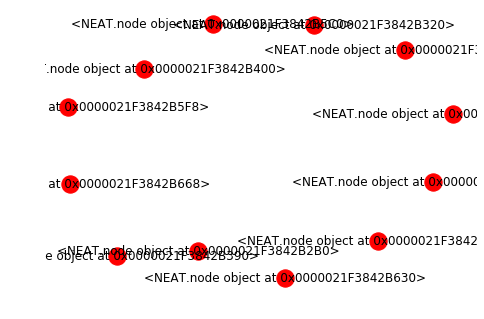

In [8]:
nx.draw(G, with_labels = True)

In [9]:
n = NEAT.network()

In [10]:
n.initalize_network(4, 4, [4,5,3,9])

In [11]:
for node in n.nodes:
    print(node.is_input)


True
True
True
True
False
False
False
False


In [12]:
 n.generate_graph()
#n.draw_graph()

In [13]:
for node in n.nodes:
    if node.label == "hidden8":
        for node1 in node.connected_to_in:
            print(node1.input_node.label)

In [14]:
n.generate_graph()
#n.draw_graph()

In [15]:
y = [connection for connection in n.weights]

In [16]:
#sorted(y, key = lambda x: x.innovation_number, reverse = True)

In [17]:
#y

In [18]:
#new.draw_graph()

In [19]:
#n.draw_graph()

In [20]:
for i in range (1000):
    if n.mutation():
        n.current_innovation += 1
    n.current_innovation += 1
print("done")

n.generate_graph()

done


In [21]:
import numpy as np
x = [weight.innovation_number for weight in n.weights]
values, counts = np.unique(x, return_counts = True)
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [22]:
n.convert_to_genes(n.current_innovation)
for gene in n.genes:
    if gene != None:
        gene.print_gene()

input 0 -> output 4  Inovation_number:  0 

input 0 -> output 5 DISABLED Inovation_number:  1 

input 0 -> output 6 DISABLED Inovation_number:  2 

input 0 -> output 7 DISABLED Inovation_number:  3 

input 1 -> output 4 DISABLED Inovation_number:  4 

input 1 -> output 5 DISABLED Inovation_number:  5 

input 1 -> output 6 DISABLED Inovation_number:  6 

input 1 -> output 7 DISABLED Inovation_number:  7 

input 2 -> output 4 DISABLED Inovation_number:  8 

input 2 -> output 5  Inovation_number:  9 

input 2 -> output 6 DISABLED Inovation_number:  10 

input 2 -> output 7 DISABLED Inovation_number:  11 

input 3 -> output 4  Inovation_number:  12 

input 3 -> output 5 DISABLED Inovation_number:  13 

input 3 -> output 6 DISABLED Inovation_number:  14 

input 3 -> output 7 DISABLED Inovation_number:  15 

input 2 -> hidden8  Inovation_number:  94 

hidden8 -> output 4  Inovation_number:  95 

input 0 -> hidden8  Inovation_number:  104 

input 1 -> hidden8  Inovation_number:  120 

input 3

In [23]:
n1  = NEAT.create_new_network_from_genes(n.genes)
NEAT.are_networks_equal(n, n1)

True

In [24]:
#n.test_network()

In [25]:
n.evaluate_network()

[2.3184766228142543e-146,
 4.412202624641007e-75,
 5.232147506850964e-35,
 0.07584452075205692]

In [26]:
n.determine_fitness_one_hot([0,0,1,0])

8.55068526681577

In [27]:
p = NEAT.Population(150, .15)
p.create_population(4, 4, [1,2,1,2])


In [28]:
for i in range(1000):
    p.mutate()
x = p.evaluate()
y = p.get_fitness([1,0,1,0])
sorted(y, reverse = True)[0:10]

[(15.999999750750254, 'network 8', <NEAT.network at 0x21f392f3e80>),
 (15.999801375535336, 'network 134', <NEAT.network at 0x21f39482f98>),
 (15.99728548919325, 'network 113', <NEAT.network at 0x21f394553c8>),
 (15.488628004825184, 'network 53', <NEAT.network at 0x21f393ca3c8>),
 (13.723433559103318, 'network 102', <NEAT.network at 0x21f3943ba58>),
 (12.897677985862021, 'network 94', <NEAT.network at 0x21f39429518>),
 (12.688751612910828, 'network 41', <NEAT.network at 0x21f393af3c8>),
 (12.249999999142437, 'network 62', <NEAT.network at 0x21f393dbf98>),
 (12.249982406057802, 'network 10', <NEAT.network at 0x21f3936c518>),
 (12.249978882604422, 'network 93', <NEAT.network at 0x21f39424e48>)]

In [29]:
fittest = sorted(y)[-1][2]
second_fittest = sorted(y)[-2][2]
fittest.genes

[]

In [30]:
for gene in fittest.genes:
    if gene != None:
        gene.print_gene()

In [31]:
child_genome = p.reproduce(fittest, second_fittest)
child_network = NEAT.create_new_network_from_genes(child_genome, label = "child")
child_network.evaluate_network()
child_network.determine_fitness_one_hot([1,0,1,0]) 

30 34 169 33 34
genes from parent 1:  24 genes from parent 2:  9 total genes:  33


16.0

In [32]:
child_network.evaluate_network()

[1.0, 4.922089467962375e-33, 1.0, 6.722045659080445e-26]

In [33]:
res = p.get_disjoint_genes(child_network, second_fittest)
re = p.get_excess_genes(child_network, second_fittest)
if re[1] != None:
    print(len(re[0]), re[1].label)
else:
    print(len(re[0]), "equal")
second_fittest.label 

3 child


'network 134'

In [34]:
def print_genome(genome):
    for gene in genome:
        gene.print_gene()


In [35]:
p.generate_genes()
distances = []
for network in p.networks:
    distances.append((p.compatability_distance(child_network, network), network.label))
sorted(distances, key = lambda x: x[0])

[(1.0284019768370567, 'network 8'),
 (1.9656394728372357, 'network 134'),
 (2.396139562037732, 'network 139'),
 (2.470408588700298, 'network 9'),
 (2.708285340809134, 'network 43'),
 (2.720027809825257, 'network 62'),
 (2.778982692409573, 'network 129'),
 (2.8239292519927934, 'network 10'),
 (2.8588143973666016, 'network 71'),
 (2.864806105863514, 'network 17'),
 (2.8694004565130857, 'network 113'),
 (2.8837723209207113, 'network 48'),
 (2.922963774049194, 'network 106'),
 (2.942727346579889, 'network 92'),
 (2.949096419315119, 'network 66'),
 (2.953744846963925, 'network 42'),
 (2.964987287315689, 'network 88'),
 (2.9798733902229824, 'network 4'),
 (2.995998347842987, 'network 5'),
 (3.012935376931005, 'network 7'),
 (3.0194864565675195, 'network 137'),
 (3.0360012793422673, 'network 104'),
 (3.0541948935332783, 'network 70'),
 (3.065493229713869, 'network 122'),
 (3.0770391405939854, 'network 117'),
 (3.0811577515417, 'network 53'),
 (3.097485344472147, 'network 37'),
 (3.10785727564

In [36]:
p.compatability_distance(child_network, fittest)
second_fittest.label

'network 134'

In [37]:
p.divide_into_species()

In [38]:
len(p.species)

42

In [39]:
len(p.networks)

150

In [40]:
count = 0
for species in p.species:
    if len(species.members) >= 5:
        species.share_fitness()
        print("species", count)
        for member in species.members:
            print(member.shared_fitness, member.fitness)
        count += 1

network 117 network 6 3.1358971528734996
network 117 network 50 3.64362860781583
network 117 network 78 3.867683033063762
network 117 network 82 3.5230483535927215
network 117 network 88 3.03371129961636
network 117 network 104 3.196699753634086
network 117 network 121 3.348650502038987
network 117 network 131 3.0059911196336335
network 117 network 133 3.057835368234544
network 0 network 76 3.3511805930949112
network 0 network 82 3.072284571944098
network 0 network 121 3.383591340229209
network 0 network 129 3.2320622042978346
network 0 network 131 3.830445594993318
network 0 network 133 3.0905939273654344
network 4 network 26 3.0741907068881695
network 4 network 88 3.225709041414263
network 4 network 129 3.149329706814422
network 4 network 131 3.0875355126834143
network 6 network 117 3.1358971528734996
network 6 network 50 3.5433180151062147
network 6 network 78 3.376934696188541
network 6 network 82 3.8022989885579106
network 6 network 129 3.49432900211948
network 6 network 131 3.607

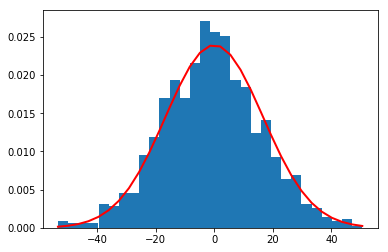

In [41]:
import matplotlib.pyplot as plt
mu, sigma = 0, 50/3
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()